## 1.Import Libraries and Load Data

Environment

In [2]:
import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(476.6223, shape=(), dtype=float32)


In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
data = pd.read_csv("..\data\processed_data\exported_data.csv")
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\fsukr\AppData\Local\Temp\ipykernel_2120\301872110.py:1: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv("..\data\processed_data\exported_data.csv")


,Ad_CPC,Ad_CTR,Ad_Spend,Category,Clicks,Conversion_Rate,Customer_ID,Discount_Applied,Impressions,Product_ID,...,year,month,Category_encoded,Region_encoded,Revenue_per_Unit,Revenue_per_Click,CPA,ROI,Revenue_to_Ad_Spend,Revenue_to_Impressions
0,0.41,0.0658,26.98,Electronics,30,0.13,Customer_10077,0.17,236,Product_857,...,2023,12,2,2,1.443170,10.775667,0.120446,10.981838,11.981838,1.369788
1,1.74,0.1259,219.07,Toys,34,0.10,Customer_935,0.25,342,Product_353,...,2023,12,4,2,0.942405,2.189706,2.773038,-0.660154,0.339846,0.217690
2,0.81,0.0862,69.82,Clothing,41,0.56,Customer_11252,0.15,73,Product_880,...,2023,12,1,1,3.221102,9.270488,0.591695,4.443856,5.443856,5.206712
3,0.90,0.1560,140.40,Clothing,30,0.18,Customer_9320,0.12,166,Product_159,...,2023,12,1,1,4.277763,10.837000,1.847368,1.315598,2.315598,1.958494
4,1.38,0.1674,231.01,Home Appliances,28,0.68,Customer_9297,0.30,41,Product_731,...,2023,12,3,1,0.792781,4.785000,1.366923,-0.420025,0.579975,3.267805


In [44]:
data.describe()

c:\Users\fsukr\OneDrive\Documents\WeStride\Data_Engineer\Projects\e-commerce-eda-ml\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Ad_CPC,Ad_CTR,Ad_Spend,Clicks,Conversion_Rate,Discount_Applied,Impressions,Revenue,Units_Sold,Discount_Amount,...,year,month,Category_encoded,Region_encoded,Revenue_per_Unit,Revenue_per_Click,CPA,ROI,Revenue_to_Ad_Spend,Revenue_to_Impressions
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.051250,0.104988,110.477240,24.539170,0.198138,0.149872,254.539060,553.110811,128.328580,97.633214,...,2023.931860,6.524140,2.036570,0.997910,5.012404,inf,1.008454,12.661150,13.661150,4.441670
std,0.549252,0.054806,87.015846,14.412477,0.361187,0.086692,141.466606,428.366294,49.679873,103.143530,...,0.251987,3.451263,1.405864,0.816916,4.572521,NaN,0.952858,31.564643,31.564643,8.948455
min,0.100000,0.010000,1.050000,0.000000,0.000000,0.000000,10.000000,7.650000,51.000000,0.000000,...,2023.000000,1.000000,0.000000,0.000000,0.040766,1.861364e-01,0.004063,-0.975028,0.024972,0.017535
25%,0.580000,0.057500,38.610000,12.000000,0.050000,0.070000,132.000000,221.260000,84.000000,22.760000,...,2024.000000,4.000000,1.000000,0.000000,1.716342,9.001299e+00,0.311640,1.075329,2.075329,0.870000
50%,1.050000,0.105200,87.240000,25.000000,0.100000,0.150000,254.000000,428.155000,127.000000,61.960000,...,2024.000000,7.000000,2.000000,1.000000,3.639538,2.061765e+01,0.712752,4.081852,5.081852,1.955098
75%,1.530000,0.152300,164.220000,37.000000,0.190000,0.220000,377.000000,805.865000,166.000000,137.405000,...,2024.000000,10.000000,3.000000,2.000000,6.881543,4.569777e+01,1.398714,11.756096,12.756096,4.155191
max,2.000000,0.200000,399.600000,49.000000,4.900000,0.300000,499.000000,5704.180000,716.000000,1638.660000,...,2024.000000,12.000000,4.000000,2.000000,35.787407,inf,6.972642,1144.074324,1145.074324,252.035385


In [45]:
# Check for null values
print("Null Values:\n", data.isnull().sum())

# Select only numeric columns
numeric_columns = data.select_dtypes(include=[np.number])

# Check for infinity values in numeric columns
inf_values = np.isinf(numeric_columns).sum()
print("Infinity Values:\n", inf_values)

Null Values:
 Ad_CPC                    0
Ad_CTR                    0
Ad_Spend                  0
Category                  0
Clicks                    0
Conversion_Rate           0
Customer_ID               0
Discount_Applied          0
Impressions               0
Product_ID                0
Region                    0
Revenue                   0
Transaction_Date          0
Transaction_ID            0
Units_Sold                0
Discount_Amount           0
day                       0
Day_of_Week               0
Is_Weekend                0
year                      0
month                     0
Category_encoded          0
Region_encoded            0
Revenue_per_Unit          0
Revenue_per_Click         0
CPA                       0
ROI                       0
Revenue_to_Ad_Spend       0
Revenue_to_Impressions    0
dtype: int64
Infinity Values:
 Ad_CPC                       0
Ad_CTR                       0
Ad_Spend                     0
Clicks                       0
Conversion_Rate    

In [46]:
# Fill missing numerical values with the column mean
numerical_columns = data.select_dtypes(include=[np.number]).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Fill missing categorical values with the mode
categorical_columns = data.select_dtypes(include=[object]).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Verify if null values are handled
print("Null Values After Handling:\n", data.isnull().sum())

Null Values After Handling:
 Ad_CPC                    0
Ad_CTR                    0
Ad_Spend                  0
Category                  0
Clicks                    0
Conversion_Rate           0
Customer_ID               0
Discount_Applied          0
Impressions               0
Product_ID                0
Region                    0
Revenue                   0
Transaction_Date          0
Transaction_ID            0
Units_Sold                0
Discount_Amount           0
day                       0
Day_of_Week               0
Is_Weekend                0
year                      0
month                     0
Category_encoded          0
Region_encoded            0
Revenue_per_Unit          0
Revenue_per_Click         0
CPA                       0
ROI                       0
Revenue_to_Ad_Spend       0
Revenue_to_Impressions    0
dtype: int64


In [47]:
# Replace positive and negative infinity with NaN
data[numeric_columns.columns] = data[numeric_columns.columns].replace([np.inf, -np.inf], np.nan)

# Fill NaN (resulting from inf) with the mean of each column
data[numeric_columns.columns] = data[numeric_columns.columns].fillna(data[numeric_columns.columns].mean())

# Verify the dataset
print("Infinity Values After Handling:\n", np.isinf(data[numeric_columns.columns]).sum())
print("Null Values After Handling:\n", data.isnull().sum())

Infinity Values After Handling:
 Ad_CPC                    0
Ad_CTR                    0
Ad_Spend                  0
Clicks                    0
Conversion_Rate           0
Discount_Applied          0
Impressions               0
Revenue                   0
Units_Sold                0
Discount_Amount           0
day                       0
Day_of_Week               0
Is_Weekend                0
year                      0
month                     0
Category_encoded          0
Region_encoded            0
Revenue_per_Unit          0
Revenue_per_Click         0
CPA                       0
ROI                       0
Revenue_to_Ad_Spend       0
Revenue_to_Impressions    0
dtype: int64
Null Values After Handling:
 Ad_CPC                    0
Ad_CTR                    0
Ad_Spend                  0
Category                  0
Clicks                    0
Conversion_Rate           0
Customer_ID               0
Discount_Applied          0
Impressions               0
Product_ID                0
R

In [48]:
# Ensure 'Transaction_Date' is in datetime format
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])

# List of columns to aggregate
selected_columns = ['Revenue', 'Units_Sold', 'Discount_Amount', 'Ad_Spend', 'Clicks', 'Impressions']

# Initialize an empty dictionary to store results
aggregated_data = {}

# Loop through each selected column and aggregate
for column in selected_columns:
    aggregated_column = data.groupby('Transaction_Date')[column].sum().reset_index()
    aggregated_column.rename(columns={column: f'{column}_Daily_Sum'}, inplace=True)
    aggregated_data[column] = aggregated_column

# Merge aggregated columns into a single DataFrame
daily_data = aggregated_data[selected_columns[0]]  # Start with the first column
for column in selected_columns[1:]:
    daily_data = daily_data.merge(aggregated_data[column], on='Transaction_Date', how='left')

print(daily_data.head())

  Transaction_Date  Revenue_Daily_Sum  Units_Sold_Daily_Sum  \
0       2023-12-07          164496.57                 37387   
1       2023-12-08          149842.59                 36429   
2       2023-12-09          163990.97                 37988   
3       2023-12-10          129052.66                 30975   
4       2023-12-11          152001.32                 35123   

   Discount_Amount_Daily_Sum  Ad_Spend_Daily_Sum  Clicks_Daily_Sum  \
0                   27648.77            32296.46              7065   
1                   23827.48            30969.52              6627   
2                   28260.44            29392.80              7540   
3                   20548.31            27014.81              5585   
4                   27861.41            30055.44              6847   

   Impressions_Daily_Sum  
0                  76318  
1                  70883  
2                  72833  
3                  59041  
4                  71111  


In [49]:
# Add time-based features directly from Transaction_Date
daily_data['Day_of_Week'] = daily_data['Transaction_Date'].dt.dayofweek + 1  # Monday=1, Sunday=7
daily_data['Is_Weekend'] = daily_data['Day_of_Week'].apply(lambda x: 1 if x in [6, 7] else 0)

# Print the resulting DataFrame
print(daily_data.head())

  Transaction_Date  Revenue_Daily_Sum  Units_Sold_Daily_Sum  \
0       2023-12-07          164496.57                 37387   
1       2023-12-08          149842.59                 36429   
2       2023-12-09          163990.97                 37988   
3       2023-12-10          129052.66                 30975   
4       2023-12-11          152001.32                 35123   

   Discount_Amount_Daily_Sum  Ad_Spend_Daily_Sum  Clicks_Daily_Sum  \
0                   27648.77            32296.46              7065   
1                   23827.48            30969.52              6627   
2                   28260.44            29392.80              7540   
3                   20548.31            27014.81              5585   
4                   27861.41            30055.44              6847   

   Impressions_Daily_Sum  Day_of_Week  Is_Weekend  
0                  76318            4           0  
1                  70883            5           0  
2                  72833            6       

In [50]:
daily_data.count()

Transaction_Date             366
Revenue_Daily_Sum            366
Units_Sold_Daily_Sum         366
Discount_Amount_Daily_Sum    366
Ad_Spend_Daily_Sum           366
Clicks_Daily_Sum             366
Impressions_Daily_Sum        366
Day_of_Week                  366
Is_Weekend                   366
dtype: int64

In [51]:
daily_data.columns

Index(['Transaction_Date', 'Revenue_Daily_Sum', 'Units_Sold_Daily_Sum',
       'Discount_Amount_Daily_Sum', 'Ad_Spend_Daily_Sum', 'Clicks_Daily_Sum',
       'Impressions_Daily_Sum', 'Day_of_Week', 'Is_Weekend'],
      dtype='object')

In [52]:
# Capping outliers at the 1st and 99th percentiles for numerical columns
selected_num_columns = ['Revenue_Daily_Sum', 'Units_Sold_Daily_Sum',
       'Discount_Amount_Daily_Sum', 'Ad_Spend_Daily_Sum', 'Clicks_Daily_Sum',
       'Impressions_Daily_Sum']
for col in selected_num_columns:
    lower_limit = daily_data[col].quantile(0.01)
    upper_limit = daily_data[col].quantile(0.99)
    daily_data[col] = np.clip(daily_data[col], lower_limit, upper_limit)

In [53]:
# Select only potential data for ML model
# data = data[['Revenue','Units_Sold','Discount_Amount', 'Ad_Spend', 'Clicks', 'Impressions', 'Region','Category','Day_of_Week', 'Is_Weekend','day', 'month', 'year']]

In [54]:
# Sort data by date
# data = data.sort_values(by=['year', 'month', 'day']).reset_index(drop=True)

In [55]:
# data.count()

## 2.Feature Engineering

In [56]:
# Columns to normalize
columns_to_normalize = ['Revenue_Daily_Sum', 'Units_Sold_Daily_Sum',
       'Discount_Amount_Daily_Sum', 'Ad_Spend_Daily_Sum', 'Clicks_Daily_Sum',
       'Impressions_Daily_Sum']

scaler = StandardScaler()
daily_data[columns_to_normalize] = scaler.fit_transform(daily_data[columns_to_normalize])

In [57]:
daily_data.count()

Transaction_Date             366
Revenue_Daily_Sum            366
Units_Sold_Daily_Sum         366
Discount_Amount_Daily_Sum    366
Ad_Spend_Daily_Sum           366
Clicks_Daily_Sum             366
Impressions_Daily_Sum        366
Day_of_Week                  366
Is_Weekend                   366
dtype: int64

In [58]:
daily_data.head()

,Transaction_Date,Revenue_Daily_Sum,Units_Sold_Daily_Sum,Discount_Amount_Daily_Sum,Ad_Spend_Daily_Sum,Clicks_Daily_Sum,Impressions_Daily_Sum,Day_of_Week,Is_Weekend
0,2023-12-07,1.245873,1.109116,0.478454,0.979374,0.828407,1.436237,4,0
1,2023-12-08,-0.045186,0.681619,-1.185054,0.363640,-0.180027,0.281317,5,0
2,2023-12-09,1.201329,1.377306,0.744730,-0.367998,1.922028,0.695686,6,1
3,2023-12-10,-1.876841,-1.752171,-2.532546,-1.471445,-2.227515,-2.012544,7,1
4,2023-12-11,0.145004,0.098830,0.571022,-0.060516,0.326492,0.329766,1,0


In [59]:
# One-hot encode Day_of_Week and Month
daily_data = pd.get_dummies(daily_data, columns=['Day_of_Week', 'Is_Weekend'], drop_first=True)

In [60]:
daily_data.head()

,Transaction_Date,Revenue_Daily_Sum,Units_Sold_Daily_Sum,Discount_Amount_Daily_Sum,Ad_Spend_Daily_Sum,Clicks_Daily_Sum,Impressions_Daily_Sum,Day_of_Week_2,Day_of_Week_3,Day_of_Week_4,Day_of_Week_5,Day_of_Week_6,Day_of_Week_7,Is_Weekend_1
0,2023-12-07,1.245873,1.109116,0.478454,0.979374,0.828407,1.436237,False,False,True,False,False,False,False
1,2023-12-08,-0.045186,0.681619,-1.185054,0.363640,-0.180027,0.281317,False,False,False,True,False,False,False
2,2023-12-09,1.201329,1.377306,0.744730,-0.367998,1.922028,0.695686,False,False,False,False,True,False,True
3,2023-12-10,-1.876841,-1.752171,-2.532546,-1.471445,-2.227515,-2.012544,False,False,False,False,False,True,True
4,2023-12-11,0.145004,0.098830,0.571022,-0.060516,0.326492,0.329766,False,False,False,False,False,False,False


In [61]:
# Check data types
print(daily_data.dtypes)

# Identify object columns
object_columns = daily_data.select_dtypes(include=['object']).columns
print("Object columns:", object_columns)

Transaction_Date             datetime64[ns]
Revenue_Daily_Sum                   float64
Units_Sold_Daily_Sum                float64
Discount_Amount_Daily_Sum           float64
Ad_Spend_Daily_Sum                  float64
Clicks_Daily_Sum                    float64
Impressions_Daily_Sum               float64
Day_of_Week_2                          bool
Day_of_Week_3                          bool
Day_of_Week_4                          bool
Day_of_Week_5                          bool
Day_of_Week_6                          bool
Day_of_Week_7                          bool
Is_Weekend_1                           bool
dtype: object
Object columns: Index([], dtype='object')


In [62]:
# Convert boolean columns to integers
daily_data = daily_data.astype({col: 'int' for col in daily_data.select_dtypes(include=['bool']).columns})

In [63]:
daily_data.to_csv('test_notebook.csv')

In [24]:
# Check all dtypes
print(daily_data.dtypes)

# Identify any remaining object columns
object_columns = daily_data.select_dtypes(include=['object']).columns
if not object_columns.empty:
    print(f"Object columns: {object_columns}")

Transaction_Date             datetime64[ns]
Revenue_Daily_Sum                   float64
Units_Sold_Daily_Sum                float64
Discount_Amount_Daily_Sum           float64
Ad_Spend_Daily_Sum                  float64
Clicks_Daily_Sum                    float64
Impressions_Daily_Sum               float64
Day_of_Week_2                         int64
Day_of_Week_3                         int64
Day_of_Week_4                         int64
Day_of_Week_5                         int64
Day_of_Week_6                         int64
Day_of_Week_7                         int64
Is_Weekend_1                          int64
dtype: object


In [25]:
lookback = 7  # Number of days to look back

# Create lagged features
for col in columns_to_normalize:
    for lag in range(1, lookback + 1):
        daily_data[f'{col}_lag_{lag}'] = daily_data[col].shift(lag)

# Drop rows with NaN values caused by lagging
daily_data = daily_data.dropna().reset_index(drop=True)

## 3.ML model

In [26]:
# Define target and features
X = daily_data.drop(columns=['Transaction_Date','Revenue_Daily_Sum'])
y = daily_data['Revenue_Daily_Sum']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

print(f"Training shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")

Training shape: (251, 54), Validation shape: (54, 54), Test shape: (54, 54)


In [27]:
X.describe()

,Units_Sold_Daily_Sum,Discount_Amount_Daily_Sum,Ad_Spend_Daily_Sum,Clicks_Daily_Sum,Impressions_Daily_Sum,Day_of_Week_2,Day_of_Week_3,Day_of_Week_4,Day_of_Week_5,Day_of_Week_6,...,Clicks_Daily_Sum_lag_5,Clicks_Daily_Sum_lag_6,Clicks_Daily_Sum_lag_7,Impressions_Daily_Sum_lag_1,Impressions_Daily_Sum_lag_2,Impressions_Daily_Sum_lag_3,Impressions_Daily_Sum_lag_4,Impressions_Daily_Sum_lag_5,Impressions_Daily_Sum_lag_6,Impressions_Daily_Sum_lag_7
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,...,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,-0.003635,0.007106,0.001901,0.002236,-0.002011,0.142061,0.142061,0.144847,0.144847,0.142061,...,-0.001486,-0.002717,0.001022,0.001388,0.003521,0.002550,-0.002435,-0.003520,-0.000662,0.005272
std,1.001513,0.997218,1.004935,0.996295,1.000536,0.349600,0.349600,0.352438,0.352438,0.349600,...,1.001210,1.001157,1.001749,0.996240,0.996786,0.996297,1.001890,1.000919,1.000261,1.002453
min,-2.347254,-2.532546,-2.133297,-2.227515,-2.012544,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.227515,-2.227515,-2.227515,-2.012544,-2.012544,-2.012544,-2.012544,-2.012544,-2.012544,-2.012544
25%,-0.698823,-0.573579,-0.737517,-0.634743,-0.732505,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.625534,-0.625534,-0.625534,-0.722730,-0.722730,-0.722730,-0.732505,-0.732505,-0.722730,-0.722730
50%,0.025201,-0.089320,0.006731,-0.039583,-0.037216,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.039583,-0.039583,-0.039583,-0.037216,-0.036578,-0.036578,-0.036578,-0.036578,-0.017241,0.010384
75%,0.659976,0.575749,0.734877,0.706382,0.642668,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.706382,0.706382,0.707533,0.642668,0.642880,0.639799,0.639799,0.639799,0.639799,0.642880
max,2.470035,2.334384,2.215625,2.419683,2.626623,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.419683,2.419683,2.419683,2.626623,2.626623,2.626623,2.626623,2.626623,2.626623,2.626623


In [28]:
# Function to create sequences
def create_sequences(daily_data, target, lookback):
    X, y = [], []
    for i in range(len(daily_data) - lookback):
        X.append(daily_data[i:i+lookback])
        y.append(target[i+lookback])
    return np.array(X), np.array(y)

lookback = 7  # Number of time steps
num_features = 54

# Create sequences for each split
X_train_seq, y_train_seq = create_sequences(X_train.values, y_train.values, lookback)
X_val_seq, y_val_seq = create_sequences(X_val.values, y_val.values, lookback)
X_test_seq, y_test_seq = create_sequences(X_test.values, y_test.values, lookback)

print(f"Training shape: {X_train_seq.shape}, Validation shape: {X_val_seq.shape}, Test shape: {X_test_seq.shape}")

Training shape: (244, 7, 54), Validation shape: (47, 7, 54), Test shape: (47, 7, 54)


In [29]:
y_train_seq.shape

(244,)

In [30]:
print("X_train_seq sample:", X_train_seq[:5])
print("y_train_seq sample:", y_train_seq[:5])
print("y_train_seq sample:", X_val_seq[:5])
print("y_train_seq sample:", y_val_seq[:5])
print("y_train_seq sample:", X_test_seq[:5])
print("y_train_seq sample:", y_test_seq[:5])

X_train_seq sample: [[[-0.64415871  0.10769532  0.97730933 ...  0.69568596  0.28131713
    1.43623744]
  [-0.32777488 -0.28850378 -0.96229351 ... -2.01254373  0.69568596
    0.28131713]
  [-2.34725419 -1.32370518 -1.43676409 ...  0.32976641 -2.01254373
    0.69568596]
  ...
  [ 1.7784757   1.06971403  1.16039518 ... -0.64835653  0.64001179
    0.32976641]
  [ 0.17736826  0.25139215 -0.1624437  ... -0.74228013 -0.64835653
    0.64001179]
  [ 0.06179223  0.01213686  0.33585458 ...  0.05224554 -0.74228013
   -0.64835653]]

 [[-0.32777488 -0.28850378 -0.96229351 ... -2.01254373  0.69568596
    0.28131713]
  [-2.34725419 -1.32370518 -1.43676409 ...  0.32976641 -2.01254373
    0.69568596]
  [ 1.33625233  0.97335893  0.25742501 ...  0.64001179  0.32976641
   -2.01254373]
  ...
  [ 0.17736826  0.25139215 -0.1624437  ... -0.74228013 -0.64835653
    0.64001179]
  [ 0.06179223  0.01213686  0.33585458 ...  0.05224554 -0.74228013
   -0.64835653]
  [ 0.42592368  0.64109619 -0.07756418 ... -1.9301374

In [31]:
# Input shape for the LSTM model
input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])
print(f"LSTM Input Shape: {input_shape}")

LSTM Input Shape: (7, 54)


In [32]:
# Check input data types for training, validation, and test sets
print(f"X_train_seq dtype: {X_train_seq.dtype}")
print(f"X_val_seq dtype: {X_val_seq.dtype}")
print(f"X_test_seq dtype: {X_test_seq.dtype}")

X_train_seq dtype: float64
X_val_seq dtype: float64
X_test_seq dtype: float64


In [33]:
# Hyper parameter tuning with  Keras Tuner (Grid Search)
import keras_tuner as kt
def build_model(hp):
    model = Sequential()
    # Tune number of units in the first LSTM layer
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=128, step=32),
        activation='relu',
        input_shape=(lookback, num_features),
        return_sequences=True
    ))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    # Tune the number of layers
    model.add(LSTM(
        units=hp.Int('units_layer2', min_value=32, max_value=128, step=32),
        activation='relu'
    ))
    model.add(Dense(1))
    # Tune the learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[0.001, 0.01, 0.0001])
        ),
        loss='mse'
    )
    return model

In [34]:
# Set up tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='tuning_results',
    project_name='lstm_tuning'
)

Reloading Tuner from tuning_results\lstm_tuning\tuner0.json


In [35]:
# Tuning process
tuner.search(X_train_seq, y_train_seq, epochs=15, validation_data=(X_val_seq, y_val_seq), batch_size=16)

In [36]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the first LSTM layer is {best_hps.get('units')}.
The optimal dropout rate is {best_hps.get('dropout')}.
The optimal number of units in the second LSTM layer is {best_hps.get('units_layer2')}.
The optimal learning rate is {best_hps.get('learning_rate')}.
""")


The optimal number of units in the first LSTM layer is 64.
The optimal dropout rate is 0.1.
The optimal number of units in the second LSTM layer is 96.
The optimal learning rate is 0.001.



In [37]:
# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=300,  # Stop if no improvement for 5 epochs
    restore_best_weights=True
)

# Train the model
history = best_model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=500,  # Use more epochs for full training
    batch_size=16,  # Keep the batch size consistent with the tuning
    verbose=1
)

Epoch 1/500


c:\Users\fsukr\OneDrive\Documents\WeStride\Data_Engineer\Projects\e-commerce-eda-ml\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.0103 - val_loss: 0.9441
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0160 - val_loss: 0.9475
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9525 - val_loss: 0.9572
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9609 - val_loss: 0.9611
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9630 - val_loss: 0.9893
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9408 - val_loss: 1.0714
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7732 - val_loss: 1.0158
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8161 - val_loss: 1.0903
Epoch 9/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6265 - val_loss: 1.2274
Epoch 10/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6844 - val_loss: 1.2604
Epoch 11/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6384 - val_loss: 1.1428
Epoch 12/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6196 - val_l

In [38]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 64)          │        30,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 96)             │        61,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,157 (1.06 MB)

 Trainable params: 92,385 (360.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 184,772 (721.77 KB)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

model_path = 'models/lstm_revenue_prediction_re2.keras'
test_model = tf.keras.models.load_model(model_path)
# Predict on the test set
y_pred = test_model.predict(X_test_seq)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_seq, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_seq, y_pred))

print(f"Test MAE: {mae}")
print(f"Test RMSE: {rmse}")

c:\Users\fsukr\OneDrive\Documents\WeStride\Data_Engineer\Projects\e-commerce-eda-ml\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Test MAE: 0.7381622433557943
Test RMSE: 0.9306337298063276


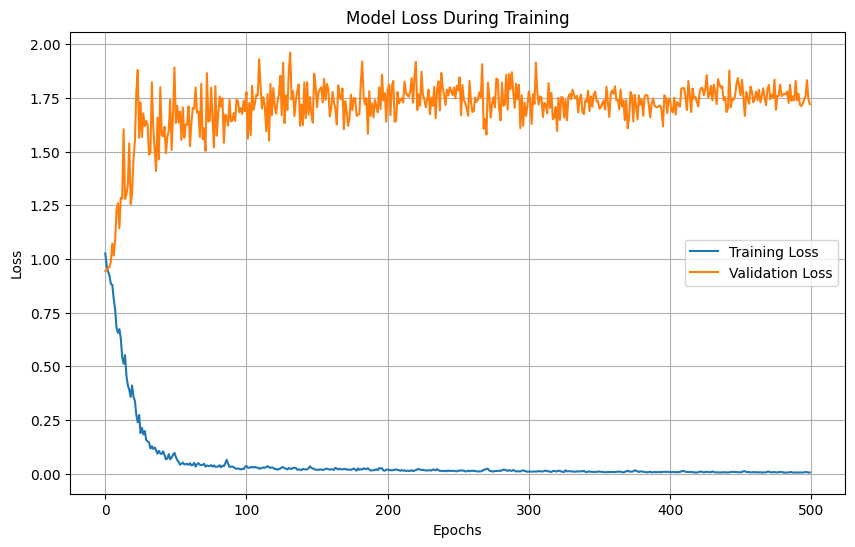

In [40]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

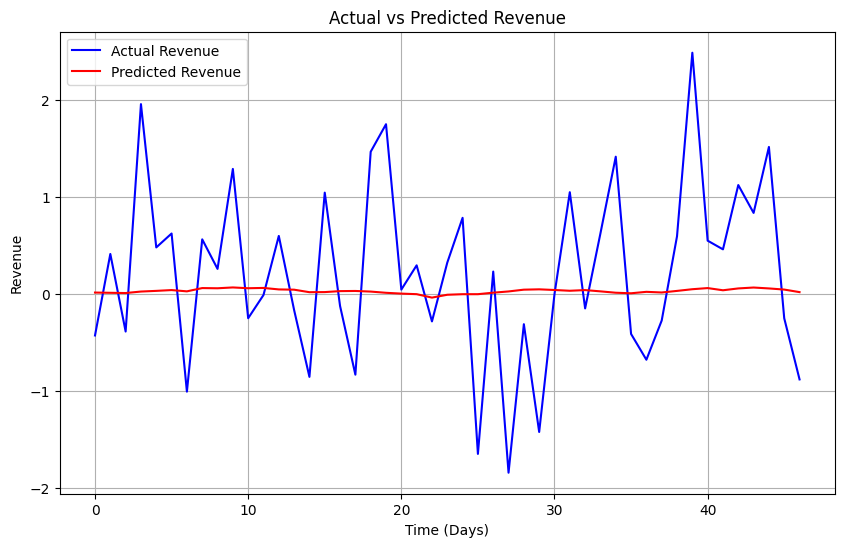

In [41]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_seq)), y_test_seq, label='Actual Revenue', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Revenue', color='red')
plt.title('Actual vs Predicted Revenue')
plt.xlabel('Time (Days)')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
print(y_pred)

[[ 0.01581682]
 [ 0.01326132]
 [ 0.01080196]
 [ 0.02620777]
 [ 0.03316503]
 [ 0.04136566]
 [ 0.02822069]
 [ 0.06197476]
 [ 0.0599467 ]
 [ 0.06850056]
 [ 0.06032483]
 [ 0.06344811]
 [ 0.04810522]
 [ 0.04540215]
 [ 0.01947745]
 [ 0.02058337]
 [ 0.0306137 ]
 [ 0.03222158]
 [ 0.02586502]
 [ 0.01328058]
 [ 0.00494125]
 [-0.0008411 ]
 [-0.03616163]
 [-0.00693627]
 [-0.00111924]
 [-0.00094993]
 [ 0.01450898]
 [ 0.02727867]
 [ 0.04555015]
 [ 0.04902714]
 [ 0.04214681]
 [ 0.03421561]
 [ 0.04124965]
 [ 0.02806927]
 [ 0.01397446]
 [ 0.00844021]
 [ 0.02326493]
 [ 0.01653652]
 [ 0.03287394]
 [ 0.0502025 ]
 [ 0.06194107]
 [ 0.03941255]
 [ 0.05835005]
 [ 0.06760014]
 [ 0.05829588]
 [ 0.04655412]
 [ 0.02022893]]


In [177]:
best_model.save('models/lstm_revenue_prediction_re1.keras')
print("Model saved successfully!")

Model saved successfully!
